In [7]:
import numpy as np
import torch
from torch import nn, optim
import torchvision
import torchvision.models as models
from torchvision import datasets, transforms
from Models.selective_sequential import *
from Loss.triplet_regularized import *
from session import *
from LR_Schedule.cyclical import Cyclical
from LR_Schedule.cos_anneal import CosAnneal
from LR_Schedule.lr_find import lr_find
from callbacks import *
from validation import *
import Datasets.ImageData as ImageData
from Transforms.ImageTransforms import *
import util
from session import LossMeter, EvalModel
from Layers.flatten import Flatten
from torch.utils.tensorboard import SummaryWriter

In [35]:
%load_ext autoreload
%autoreload 2

torch.cuda.set_device(0); torch.backends.cudnn.benchmark=True;
torch.cuda.get_device_name(torch.cuda.current_device())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'GeForce RTX 2070 SUPER'

In [36]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

trainset = torchvision.datasets.CIFAR10(root='/media/drake/MX500/Datasets/cifar-10/train', train=True,
                                        download=True, transform=transform)
partial_trainset = torch.utils.data.dataset.Subset(trainset, np.arange(3200))

valset = torchvision.datasets.CIFAR10(root='/media/drake/MX500/Datasets/cifar-10/test', train=False,
                                       download=True, transform=transform)
partial_valset = torch.utils.data.dataset.Subset(valset, np.arange(3200))

trainloader = torch.utils.data.DataLoader(partial_trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(partial_valset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
resnet = models.resnet50(pretrained=False)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Sequential()

select = ['act1', 'act2', 'out']
model = SelectiveSequential(
    select,
    {
     'resnet': resnet,
     'fc1': nn.Linear(num_ftrs, 1024),
     'act1': nn.ReLU(True),
     'fc2': nn.Linear(1024, 512),
     'act2': nn.ReLU(True),
     'out': nn.Linear(512, 10)})

In [38]:
criterion = TripletRegularizedMultiMarginLoss(0, .5, [])
sess = Session(model, criterion, optim.Adam, 1e-4)

In [39]:
validator = EmbeddingSpaceValidator(valloader, select, CustomOneHotAccuracy, 
                                    model_file="./no-reg.ckpt.tar")
lr_scheduler = CosAnneal(len(trainloader), T_mult=2, lr_min=1e-6)
schedule = TrainingSchedule(trainloader, [lr_scheduler, validator])

In [40]:
sess.train(schedule, 63)



val accuracy:  0.155 
train loss:  0.8118  train BCE :  2.2885 
valid loss:  0.8036  valid BCE :  2.2844




val accuracy:  0.1928 
train loss:  0.7195  train BCE :  2.1558 
valid loss:  0.6748  valid BCE :  2.142




val accuracy:  0.2303 
train loss:  0.6476  train BCE :  2.0552 
valid loss:  0.6298  valid BCE :  2.0803




val accuracy:  0.2466 
train loss:  0.5828  train BCE :  1.9679 
valid loss:  0.6194  valid BCE :  2.0617




val accuracy:  0.2459 
train loss:  0.5256  train BCE :  1.8788 
valid loss:  0.6344  valid BCE :  2.0866




val accuracy:  0.2575 
train loss:  0.4737  train BCE :  1.7884 
valid loss:  0.5909  valid BCE :  2.0269




val accuracy:  0.265 
train loss:  0.4309  train BCE :  1.7251 
valid loss:  0.5753  valid BCE :  1.9961




val accuracy:  0.2791 
train loss:  0.3895  train BCE :  1.6376 
valid loss:  0.5721  valid BCE :  1.981




val accuracy:  0.2791 
train loss:  0.3445  train BCE :  1.5604 
valid loss:  0.5768  valid BCE :  1.992




val accuracy:  0.2728 
train loss:  0.2931  train BCE :  1.4293 
valid loss:  0.5922  valid BCE :  2.0205




val accuracy:  0.2756 
train loss:  0.2496  train BCE :  1.3149 
valid loss:  0.5978  valid BCE :  2.0452




val accuracy:  0.2812 
train loss:  0.2056  train BCE :  1.1832 
valid loss:  0.607  valid BCE :  2.0498




val accuracy:  0.2897 
train loss:  0.1783  train BCE :  1.1052 
valid loss:  0.5888  valid BCE :  2.0173




val accuracy:  0.2853 
train loss:  0.1581  train BCE :  1.0445 
valid loss:  0.5995  valid BCE :  2.0497




val accuracy:  0.2847 
train loss:  0.1259  train BCE :  0.8937 
valid loss:  0.6393  valid BCE :  2.1167




val accuracy:  0.2784 
train loss:  0.1037  train BCE :  0.7875 
valid loss:  0.6363  valid BCE :  2.1387




val accuracy:  0.2903 
train loss:  0.0903  train BCE :  0.7491 
valid loss:  0.634  valid BCE :  2.137




val accuracy:  0.2953 
train loss:  0.0729  train BCE :  0.6457 
valid loss:  0.6384  valid BCE :  2.1492




val accuracy:  0.2859 
train loss:  0.0618  train BCE :  0.5971 
valid loss:  0.662  valid BCE :  2.189




val accuracy:  0.2934 
train loss:  0.0552  train BCE :  0.5442 
valid loss:  0.6492  valid BCE :  2.1827




val accuracy:  0.3006 
train loss:  0.0483  train BCE :  0.5003 
valid loss:  0.6394  valid BCE :  2.1694




val accuracy:  0.2944 
train loss:  0.0471  train BCE :  0.4959 
valid loss:  0.6465  valid BCE :  2.1977




val accuracy:  0.2959 
train loss:  0.0361  train BCE :  0.4168 
valid loss:  0.6601  valid BCE :  2.2135




val accuracy:  0.3013 
train loss:  0.0271  train BCE :  0.3482 
valid loss:  0.6569  valid BCE :  2.2112




val accuracy:  0.3109 
train loss:  0.0253  train BCE :  0.3427 
valid loss:  0.6616  valid BCE :  2.2356




val accuracy:  0.305 
train loss:  0.0224  train BCE :  0.3222 
valid loss:  0.6751  valid BCE :  2.2606




val accuracy:  0.3034 
train loss:  0.0247  train BCE :  0.3355 
valid loss:  0.6714  valid BCE :  2.274




val accuracy:  0.2969 
train loss:  0.0206  train BCE :  0.2978 
valid loss:  0.6701  valid BCE :  2.2649




val accuracy:  0.2975 
train loss:  0.0198  train BCE :  0.2886 
valid loss:  0.6759  valid BCE :  2.2726




val accuracy:  0.2975 
train loss:  0.0179  train BCE :  0.2699 
valid loss:  0.6759  valid BCE :  2.2998




val accuracy:  0.3059 
train loss:  0.0175  train BCE :  0.2602 
valid loss:  0.6693  valid BCE :  2.2855




val accuracy:  0.2988 
train loss:  0.0158  train BCE :  0.2569 
valid loss:  0.6799  valid BCE :  2.2967




val accuracy:  0.3016 
train loss:  0.0145  train BCE :  0.2429 
valid loss:  0.6743  valid BCE :  2.2923




val accuracy:  0.295 
train loss:  0.0134  train BCE :  0.2335 
valid loss:  0.6754  valid BCE :  2.2961




val accuracy:  0.2947 
train loss:  0.0102  train BCE :  0.1971 
valid loss:  0.6644  valid BCE :  2.2766




val accuracy:  0.2984 
train loss:  0.0121  train BCE :  0.2262 
valid loss:  0.678  valid BCE :  2.3004




val accuracy:  0.3019 
train loss:  0.0094  train BCE :  0.1912 
valid loss:  0.6638  valid BCE :  2.2806




val accuracy:  0.3069 
train loss:  0.0092  train BCE :  0.2005 
valid loss:  0.6677  valid BCE :  2.2855




val accuracy:  0.3063 
train loss:  0.0077  train BCE :  0.1794 
valid loss:  0.6628  valid BCE :  2.2736




val accuracy:  0.3097 
train loss:  0.0077  train BCE :  0.1916 
valid loss:  0.676  valid BCE :  2.2827




val accuracy:  0.31 
train loss:  0.0075  train BCE :  0.179 
valid loss:  0.6697  valid BCE :  2.2893




val accuracy:  0.3109 
train loss:  0.0071  train BCE :  0.178 
valid loss:  0.6668  valid BCE :  2.2806




val accuracy:  0.3072 
train loss:  0.0078  train BCE :  0.1746 
valid loss:  0.6707  valid BCE :  2.2834




val accuracy:  0.3103 
train loss:  0.0068  train BCE :  0.1709 
valid loss:  0.6673  valid BCE :  2.2763




val accuracy:  0.3097 
train loss:  0.007  train BCE :  0.1744 
valid loss:  0.6715  valid BCE :  2.2801




val accuracy:  0.3081 
train loss:  0.0063  train BCE :  0.1633 
valid loss:  0.6669  valid BCE :  2.2764




val accuracy:  0.3119 
train loss:  0.0076  train BCE :  0.1792 
valid loss:  0.6681  valid BCE :  2.2803




val accuracy:  0.3084 
train loss:  0.0067  train BCE :  0.1623 
valid loss:  0.6698  valid BCE :  2.2824




val accuracy:  0.3075 
train loss:  0.007  train BCE :  0.1741 
valid loss:  0.6729  valid BCE :  2.2832




val accuracy:  0.3106 
train loss:  0.0068  train BCE :  0.1708 
valid loss:  0.6664  valid BCE :  2.2805



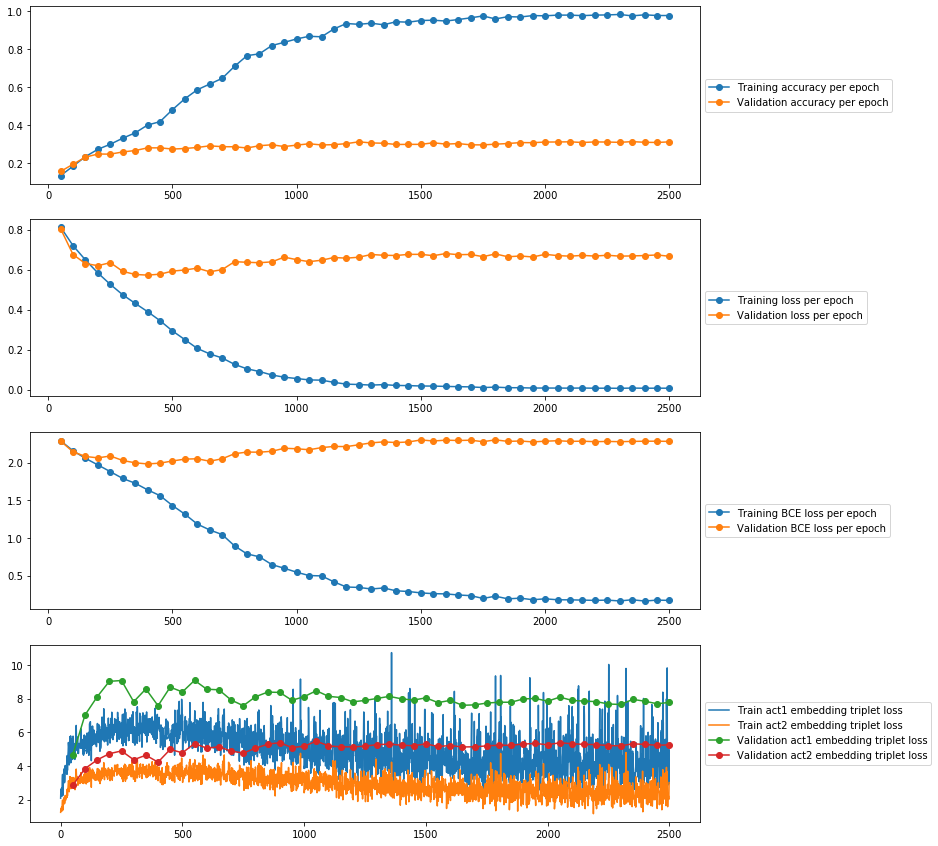

In [41]:
validator.plot()

In [42]:
sess.load("./no-reg.ckpt.tar")

In [43]:
total_valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
total_validator = EmbeddingSpaceValidator(total_valloader, [], CustomOneHotAccuracy)

total_validator.run(sess)

In [44]:
np.max(total_validator.val_accuracies), "Best accuracy without reg"

(0.3106, 'Best accuracy without reg')